In [33]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

pd.options.display.max_columns = 40
pd.options.display.max_rows = 85

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
df_train = pd.read_csv('WORK_bank_data_train.csv', sep=';')
df_train

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,Yes,Yes,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,34,Midlands,2.0,51,Gold,No,Yes,Yes,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,Yes,Yes,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,Yes,Yes,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,Yes,Yes,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,NaN,No,unknown,12,South East,6.0,42,Silver,Yes,Yes,Yes,No,2139.03,3155.41,4291.97,10,14,989.90,F,No,No
985473,1201048572,63.0,No,senior,33,South East,9.0,51,Tin,No,Yes,Yes,No,1916.91,3000.02,4045.15,11,30,884.63,F,No,No
985474,1201048573,68.0,No,senior,51,North,3.0,56,Gold,Yes,Yes,Yes,No,2053.00,3112.87,4292.20,8,16,922.66,M,No,No
985475,1201048574,45.0,No,middle,45,Midlands,1.0,54,Gold,Yes,Yes,Yes,No,2082.85,3143.77,4207.48,8,15,951.42,M,No,No


In [35]:
df_test = pd.read_csv('WORK_WORK_BANK_DATA_test_sample.csv', sep=';')
df_test

,ID,Age,Ind_House_hold,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender
0,1200000027,50.0,No,middle,22,South East,5.0,47,Tin,Yes,No,2062.32,2978.92,4054.13,7,17,950.45,M
1,1200000040,34.0,No,middle,47,South East,5.0,54,Tin,No,No,2000.73,3111.23,4265.02,5,17,982.29,F
2,1200000041,NaN,Yes,unknown,14,South East,28.0,52,Gold,Yes,No,1991.05,2990.26,4193.14,9,33,909.27,F
3,1200000071,61.0,No,senior,23,Midlands,3.0,54,Silver,Yes,No,2094.12,3089.97,4167.11,5,17,933.91,F
4,1200000080,44.0,No,middle,51,North,8.0,43,Silver,Yes,No,2034.41,2972.27,4165.87,5,17,917.13,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63093,1201048525,67.0,Yes,senior,45,Midlands,1.0,48,Silver,Yes,No,2037.32,3084.48,4236.37,12,33,904.46,M
63094,1201048529,75.0,No,senior,14,Midlands,9.0,46,Tin,Yes,No,2048.42,3072.78,4203.52,7,17,1026.79,F
63095,1201048544,54.0,No,middle,04,Midlands,2.0,53,Gold,Yes,No,2120.81,3167.97,4343.64,16,17,1017.48,U
63096,1201048557,41.0,Yes,middle,27,South West,13.0,44,Tin,Yes,No,2133.01,3201.82,4284.59,12,17,979.36,F


In [36]:
columns = df_train.columns
columns_no_id = columns[1:]

In [37]:
print(columns)

Index(['ID', 'Age', 'Ind_Household', 'Age_group', 'District', 'Region',
       'Lifetime', 'Income', 'Segment', 'Ind_deposit', 'Ind_email',
       'Ind_phone', 'Ind_salary', 'trans_6_month', 'trans_9_month',
       'trans_12_month', 'amont_trans', 'amont_day_from', 'trans_3_month',
       'Gender', 'Target1', 'Target2'],
      dtype='object')


In [38]:
for col in columns_no_id:
    print(df_train[col].describe())

count    918519.000000
mean         53.792106
std          13.196993
min          18.000000
25%          44.000000
50%          54.000000
75%          64.000000
max          79.000000
Name: Age, dtype: float64
count     985477
unique         2
top           No
freq      640250
Name: Ind_Household, dtype: object
count     985477
unique         4
top       middle
freq      578936
Name: Age_group, dtype: object
count     985477
unique        56
top           52
freq       53206
Name: District, dtype: object
count         985477
unique             6
top       South East
freq          382905
Name: Region, dtype: object
count    972869.000000
mean          6.562314
std           4.655215
min           0.000000
25%           4.000000
50%           5.000000
75%           8.000000
max          39.000000
Name: Lifetime, dtype: float64
count    985477.000000
mean         50.356128
std           5.440736
min          25.000000
25%          47.000000
50%          50.000000
75%          54.000000
ma

In [22]:
for col in columns_no_id:
    print(f'{col}: {pd.unique(df_train[col])}')

Age: [51.         47.         45.         78.         57.         33.
 60.         59.         40.         65.         54.         58.
 66.         36.         46.         31.         64.         34.
 56.         49.         75.         39.         68.         69.
 55.         53.79210555 62.         42.         50.         38.
 72.         48.         25.         52.         37.         76.
 61.         67.         43.         63.         79.         53.
 20.         73.         71.         70.         41.         35.
 74.         77.         28.         32.         44.         22.
 27.         24.         29.         30.         26.         23.
 18.         19.         21.        ]
Ind_Household: [0 1]
Lifetime: [ 3.          2.          6.         12.          8.          4.
  5.          7.          9.         15.         10.         11.
 18.          1.          0.          6.56231415 16.         13.
 19.         36.         30.         26.         17.         31.
 27.         14.

In [39]:
df_train['Target1'].value_counts()

No     741971
Yes    243506
Name: Target1, dtype: int64

In [ ]:
# Всего 243 506 клиентов откликнулись на email

In [40]:
df_train['Target2'].value_counts()

No     901093
Yes     84384
Name: Target2, dtype: int64

In [ ]:
# Тогда как на смс откликнулись 84 384 клиента

In [41]:
df_train['Age'].describe()

count    918519.000000
mean         53.792106
std          13.196993
min          18.000000
25%          44.000000
50%          54.000000
75%          64.000000
max          79.000000
Name: Age, dtype: float64

In [ ]:
# Средний возраст клиентов 54 года

In [42]:
young = df_train[(df_train['Age_group'] == 'young')]
print(len(young))
print(young['Age'].unique())
print(young['Age'].value_counts())
print(young['Age'].describe())

29190
[25. 20. 28. 22. 27. 24. 29. 30. 26. 23. 18. 19. 21.]
30.0    7450
29.0    5454
28.0    4560
27.0    3392
26.0    2094
25.0    2063
23.0     992
24.0     923
22.0     783
19.0     465
20.0     453
21.0     355
18.0     206
Name: Age, dtype: int64
count    29190.000000
mean        27.345015
std          2.779323
min         18.000000
25%         26.000000
50%         28.000000
75%         30.000000
max         30.000000
Name: Age, dtype: float64


In [43]:
middle = df_train[(df_train['Age_group'] == 'middle')]
print(len(middle))
print(middle['Age'].unique())
print(middle['Age'].value_counts())
print(middle['Age'].describe())

578936
[51. 47. 45. 57. 33. 60. 59. 40. 54. 58. 36. 46. 31. 34. 56. 49. 39. 55.
 42. 50. 38. 48. 52. 37. 43. 53. 41. 35. 32. 44.]
51.0    26914
50.0    26436
52.0    23987
53.0    23934
47.0    23559
48.0    23465
60.0    23276
54.0    22800
59.0    22667
49.0    22588
55.0    22402
58.0    21581
57.0    20847
46.0    20526
45.0    20100
44.0    20021
56.0    19854
43.0    19257
37.0    18010
41.0    17453
42.0    16869
40.0    16782
39.0    15381
35.0    15338
36.0    14793
38.0    14647
33.0    12915
34.0    12706
32.0    10488
31.0     9340
Name: Age, dtype: int64
count    578936.000000
mean         47.204249
std           8.115964
min          31.000000
25%          41.000000
50%          48.000000
75%          54.000000
max          60.000000
Name: Age, dtype: float64


In [44]:
senior = df_train[(df_train['Age_group'] == 'senior')]
print(len(senior))
print(senior['Age'].unique())
print(senior['Age'].value_counts())
print(senior['Age'].describe())

310393
[78. 65. 66. 64. 75. 68. 69. 62. 72. 76. 61. 67. 63. 79. 73. 71. 70. 74.
 77.]
63.0    22714
61.0    21700
65.0    21434
66.0    20696
62.0    20486
64.0    20426
67.0    19521
68.0    18517
69.0    16887
70.0    16693
71.0    15660
72.0    14439
74.0    14356
73.0    14287
76.0    13389
77.0    11976
75.0    11633
78.0     9064
79.0     6515
Name: Age, dtype: int64
count    310393.000000
mean         68.566723
std           5.174934
min          61.000000
25%          64.000000
50%          68.000000
75%          73.000000
max          79.000000
Name: Age, dtype: float64


In [45]:
unknown_agegroup = df_train[(df_train['Age_group'] == 'unknown')]
print(len(unknown_agegroup))
print(unknown_agegroup['Age'].unique())
print(unknown_agegroup['Age'].value_counts())
print(unknown_agegroup['Age'].describe())

66958
[nan]
Series([], Name: Age, dtype: int64)
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64


In [46]:
print(young['Target1'].value_counts())
print(young['Target2'].value_counts())

Yes    16847
No     12343
Name: Target1, dtype: int64
No     23237
Yes     5953
Name: Target2, dtype: int64


In [47]:
print(middle['Target1'].value_counts())
print(middle['Target2'].value_counts())

No     416862
Yes    162074
Name: Target1, dtype: int64
No     522840
Yes     56096
Name: Target2, dtype: int64


In [48]:
print(senior['Target1'].value_counts())
print(senior['Target2'].value_counts())

No     263657
Yes     46736
Name: Target1, dtype: int64
No     294330
Yes     16063
Name: Target2, dtype: int64


In [ ]:
# Больше всего откликов было от клиентов среднего возраста. Меньше всего откликались молодые клиенты

In [49]:
print(unknown_agegroup['Target1'].value_counts())
print(unknown_agegroup['Target2'].value_counts())

No     49109
Yes    17849
Name: Target1, dtype: int64
No     60686
Yes     6272
Name: Target2, dtype: int64


In [ ]:
# По 66 958 клиентам отсутствуют данные по возрасту

In [50]:
genders = df_train['Gender'].unique()

In [51]:
for gender in genders:
    print(f'{gender} = {len(df_train[df_train["Gender"] == gender])}')
    
int(len(df_train[df_train["Gender"] == 'U'])/len(df_train["Gender"])*100)

F = 538741
U = 189123
M = 257613


19

In [ ]:
# Больше половины клиентов женского пола (538 741 чел.) По 189 123 клиентам отсутствуют данные о поле, что составляет 19% от общего числа клиентов.

In [52]:
for gender in genders:
    print(f'{len(df_train[(df_train["Gender"] == gender) & (df_train["Target1"] == "Yes")])} клиентов {gender} пола откликнулись по email')

186115 клиентов F пола откликнулись по email
14778 клиентов U пола откликнулись по email
42613 клиентов M пола откликнулись по email


In [53]:
for gender in genders:
    print(f'{len(df_train[(df_train["Gender"] == gender) & (df_train["Target2"] == "Yes")])} клиентов {gender} пола откликнулись по телефону')

64410 клиентов F пола откликнулись по телефону
5148 клиентов U пола откликнулись по телефону
14826 клиентов M пола откликнулись по телефону


In [54]:
segments = df_train['Segment'].unique()
for segment in segments:
    segment_num = len(df_train[df_train["Segment"] == segment])
    percentage = int(len(df_train[df_train["Segment"] == segment])/len(df_train["Segment"])*100)
    print(f'{segment} = {segment_num}, что составляет {percentage}% от общего числа клиентов')

Platinum = 37144, что составляет 3% от общего числа клиентов
Gold = 280975, что составляет 28% от общего числа клиентов
Silver = 379739, что составляет 38% от общего числа клиентов
Tin = 287619, что составляет 29% от общего числа клиентов


In [55]:
for segment in segments:
    print(f'{len(df_train[(df_train["Segment"] == segment) & (df_train["Target1"] == "Yes")])} клиентов со статусом {segment} откликнулись по email')    

5621 клиентов со статусом Platinum откликнулись по email
54742 клиентов со статусом Gold откликнулись по email
93410 клиентов со статусом Silver откликнулись по email
89733 клиентов со статусом Tin откликнулись по email


In [56]:
for segment in segments:
    print(f'{len(df_train[(df_train["Segment"] == segment) & (df_train["Target2"] == "Yes")])} клиентов со статусом {segment} откликнулись по телефону')   

1949 клиентов со статусом Platinum откликнулись по телефону
19006 клиентов со статусом Gold откликнулись по телефону
32340 клиентов со статусом Silver откликнулись по телефону
31089 клиентов со статусом Tin откликнулись по телефону


In [57]:
ind_email = df_train['Ind_email'].unique()
for i in ind_email:
    num = len(df_train[df_train["Ind_email"] == i])
    percentage = int(len(df_train[df_train["Ind_email"] == i])/len(df_train["Ind_email"])*100)
    print(f'{i} = {num}, что составляет {percentage}% от общего числа клиентов')

Yes = 965956, что составляет 98% от общего числа клиентов
No = 19521, что составляет 1% от общего числа клиентов


In [58]:
ind_phone = df_train['Ind_phone'].unique()
for i in ind_phone:
    num = len(df_train[df_train["Ind_phone"] == i])
    percentage = int(len(df_train[df_train["Ind_phone"] == i])/len(df_train["Ind_phone"])*100)
    print(f'{i} = {num}, что составляет {percentage}% от общего числа клиентов')

Yes = 961490, что составляет 97% от общего числа клиентов
No = 23987, что составляет 2% от общего числа клиентов


In [59]:
print(f'{len(df_train[(df_train["Ind_email"] == "Yes") & (df_train["Target1"] == "Yes")])} клиентов имеющих email откликнулись по email')

241120 клиентов имеющих email откликнулись по email


In [60]:
print(f'{len(df_train[(df_train["Ind_email"] == "No") & (df_train["Target1"] == "Yes")])} клиентов НЕ имеющих email откликнулись по email')

2386 клиентов НЕ имеющих email откликнулись по email


In [61]:
print(f'{len(df_train[(df_train["Ind_phone"] == "Yes") & (df_train["Target2"] == "Yes")])} клиентов имеющих телефон откликнулись по телефону')

83081 клиентов имеющих телефон откликнулись по телефону


In [62]:
print(f'{len(df_train[(df_train["Ind_phone"] == "No") & (df_train["Target2"] == "Yes")])} клиентов НЕ имеющих телефон откликнулись по телефону')

1303 клиентов НЕ имеющих телефон откликнулись по телефону


In [63]:
for col in columns:
    if len(df_train[df_train[col].isnull()]) > 0:
        print(f'пустые ячейки в {col} = {len(df_train[df_train[col].isnull()])}')

пустые ячейки в Age = 66958
пустые ячейки в Lifetime = 12608


In [64]:
for col in columns:
    if len(df_train[(df_train[col] == 'Unknown') | (df_train[col] == 'unknown') | (df_train[col] == 'U')]) > 0:
        print(f'ячейки с неправильными значениями в {col} = {len(df_train[(df_train[col] == "Unknown") | (df_train[col] == "unknown") | (df_train[col] == "U")])}')

ячейки с неправильными значениями в Age_group = 66958
ячейки с неправильными значениями в District = 29752
ячейки с неправильными значениями в Region = 20510
ячейки с неправильными значениями в Gender = 189123


In [ ]:
#Отсутствующие значения в столбце Age можно заполнить средним значением, что составляет 54 года. После этого значения Unknown в столбце Age_group можно заменить соответствующей возрастной группой.

In [65]:
df_train['Age'] = df_train['Age'].fillna(float('54'))

In [66]:
len(df_train[df_train['Age'].isnull()])

0

In [67]:
df_train["Age_group"].replace("unknown", "middle", inplace=True)

In [68]:

(df_train[df_train['Age_group'] == "unknown"])

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2


In [69]:
regions = df_train["Region"].unique()

In [70]:
for region in regions:
    print(f'{region} = {len(df_train[df_train["Region"] == region])}')

Midlands = 298286
North = 192434
South East = 382905
South West = 30607
Scottish = 60735
Unknown = 20510


In [ ]:
# Клиентов больше всего из South East и ячейки со значением Unknown в столбце Region заменим значением South East

In [71]:
df_train["Region"].replace("Unknown", "South East", inplace=True)

In [72]:
regions_all_known = df_train["Region"].unique()
for region in regions_all_known:
    print(f'{region} = {len(df_train[df_train["Region"] == region])}')

Midlands = 298286
North = 192434
South East = 403415
South West = 30607
Scottish = 60735


In [73]:
df_train.isna().sum()

ID                    0
Age                   0
Ind_Household         0
Age_group             0
District              0
Region                0
Lifetime          12608
Income                0
Segment               0
Ind_deposit           0
Ind_email             0
Ind_phone             0
Ind_salary            0
trans_6_month         0
trans_9_month         0
trans_12_month        0
amont_trans           0
amont_day_from        0
trans_3_month         0
Gender                0
Target1               0
Target2               0
dtype: int64

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

def build_displots_without_nan(data, columns, n_col=1, name='displots'):
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(20, 16))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        cur_data = data[~data[columns[0]].isna()][columns[0]]
        try:
            try:
                sns_plot = sns.distplot(cur_data, ax=ax, color='blue')
            except:
                sns_plot = sns.distplot(cur_data, ax=ax, color='red', kde_kws={'bw': 0.1})
        except:
            sns_plot = cur_data.hist(ax=axes[0], color='green')
        ax.set_title(columns[0])
        plt.show()
    elif n_col >= len(columns):
        fig, axes = plt.subplots(1, n_col, figsize=(20, 16 // n_col))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[idx], color='green')
            axes[idx].set_title(columns[idx])
        plt.show()
    else:
        m = n_col
        n = (len(columns) + m - 1) // m
        fig, axes = plt.subplots(n, m, figsize=(20, n * (16 // m)))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            i, j = idx // m, idx % m
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[i, j], color='green')
            axes[i, j].set_title(columns[idx])
        plt.show()
    return

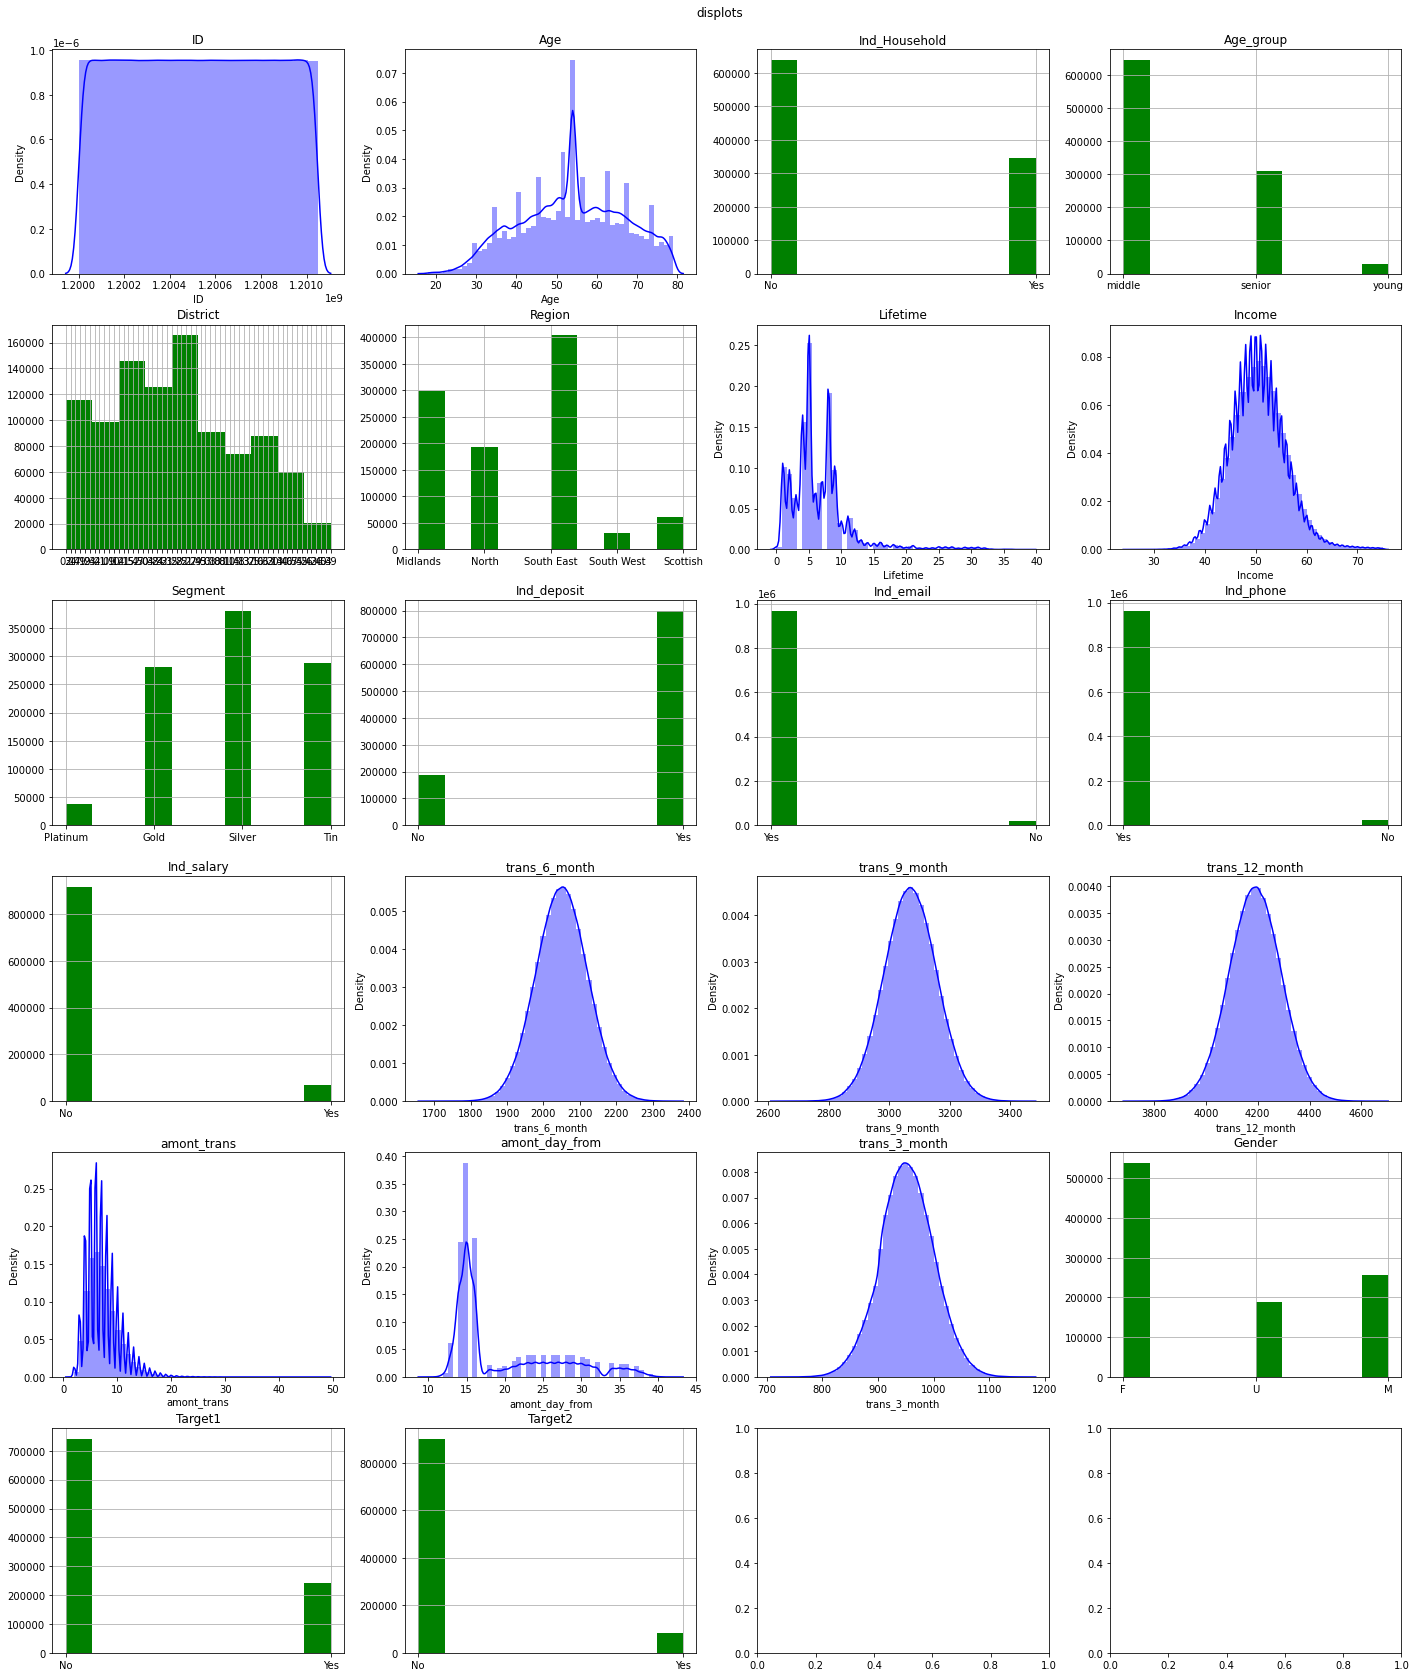

In [75]:
build_displots_without_nan(df_train, columns=df_train.columns, n_col=4, name='displots')

In [76]:
for age_group in df_train['Age_group'].unique():
    print('group:', age_group)
    print('count:', df_train[df_train['Age_group'] == age_group].shape[0])
    print('nan: ', df_train[df_train['Age_group'] == age_group]['Age'].isna().sum(), ' (',
          round(df_train[df_train['Age_group'] == age_group]['Age'].isna().sum() / 
                df_train[df_train['Age_group'] == age_group].shape[0] * 100, 2), '%)', sep='')
    print('displot: ', df_train[df_train['Age_group'] == age_group]['Age'].min(), '-', 
          df_train[df_train['Age_group'] == age_group]['Age'].max())
    print('-' * 20)

group: middle
count: 645894
nan: 0 (0.0%)
displot:  31.0 - 60.0
--------------------
group: senior
count: 310393
nan: 0 (0.0%)
displot:  61.0 - 79.0
--------------------
group: young
count: 29190
nan: 0 (0.0%)
displot:  18.0 - 30.0
--------------------


In [77]:
print('num of zero transactions for 12 months =',
      df_train[df_train['trans_12_month'] == 0].shape[0])
print('num of zero transactions for  9 months =',
      df_train[df_train['trans_9_month'] == 0].shape[0])
print('num of zero transactions for  6 months =',
      df_train[df_train['trans_6_month'] == 0].shape[0])
print('num of zero transactions for  3 months =',
      df_train[df_train['trans_3_month'] == 0].shape[0])

num of zero transactions for 12 months = 0
num of zero transactions for  9 months = 0
num of zero transactions for  6 months = 0
num of zero transactions for  3 months = 0


In [78]:
print('9-12 :', df_train[df_train['trans_12_month'] == df_train['trans_9_month']].shape[0])
print('6-9  :', df_train[df_train['trans_9_month'] == df_train['trans_6_month']].shape[0])
print('3-6  :', df_train[df_train['trans_6_month'] == df_train['trans_3_month']].shape[0])

9-12 : 0
6-9  : 0
3-6  : 0


In [79]:
df_test.isna().sum()

ID                   0
Age               4369
Ind_House_hold       0
Age_group            0
District             0
Region               0
Lifetime           787
Income               0
Segment              0
Ind_deposit          0
Ind_salary           0
trans_6_month        0
trans_9_month        0
trans_12_month       0
amont_trans          0
amont_day_from       0
trans_3_month        0
Gender               0
dtype: int64

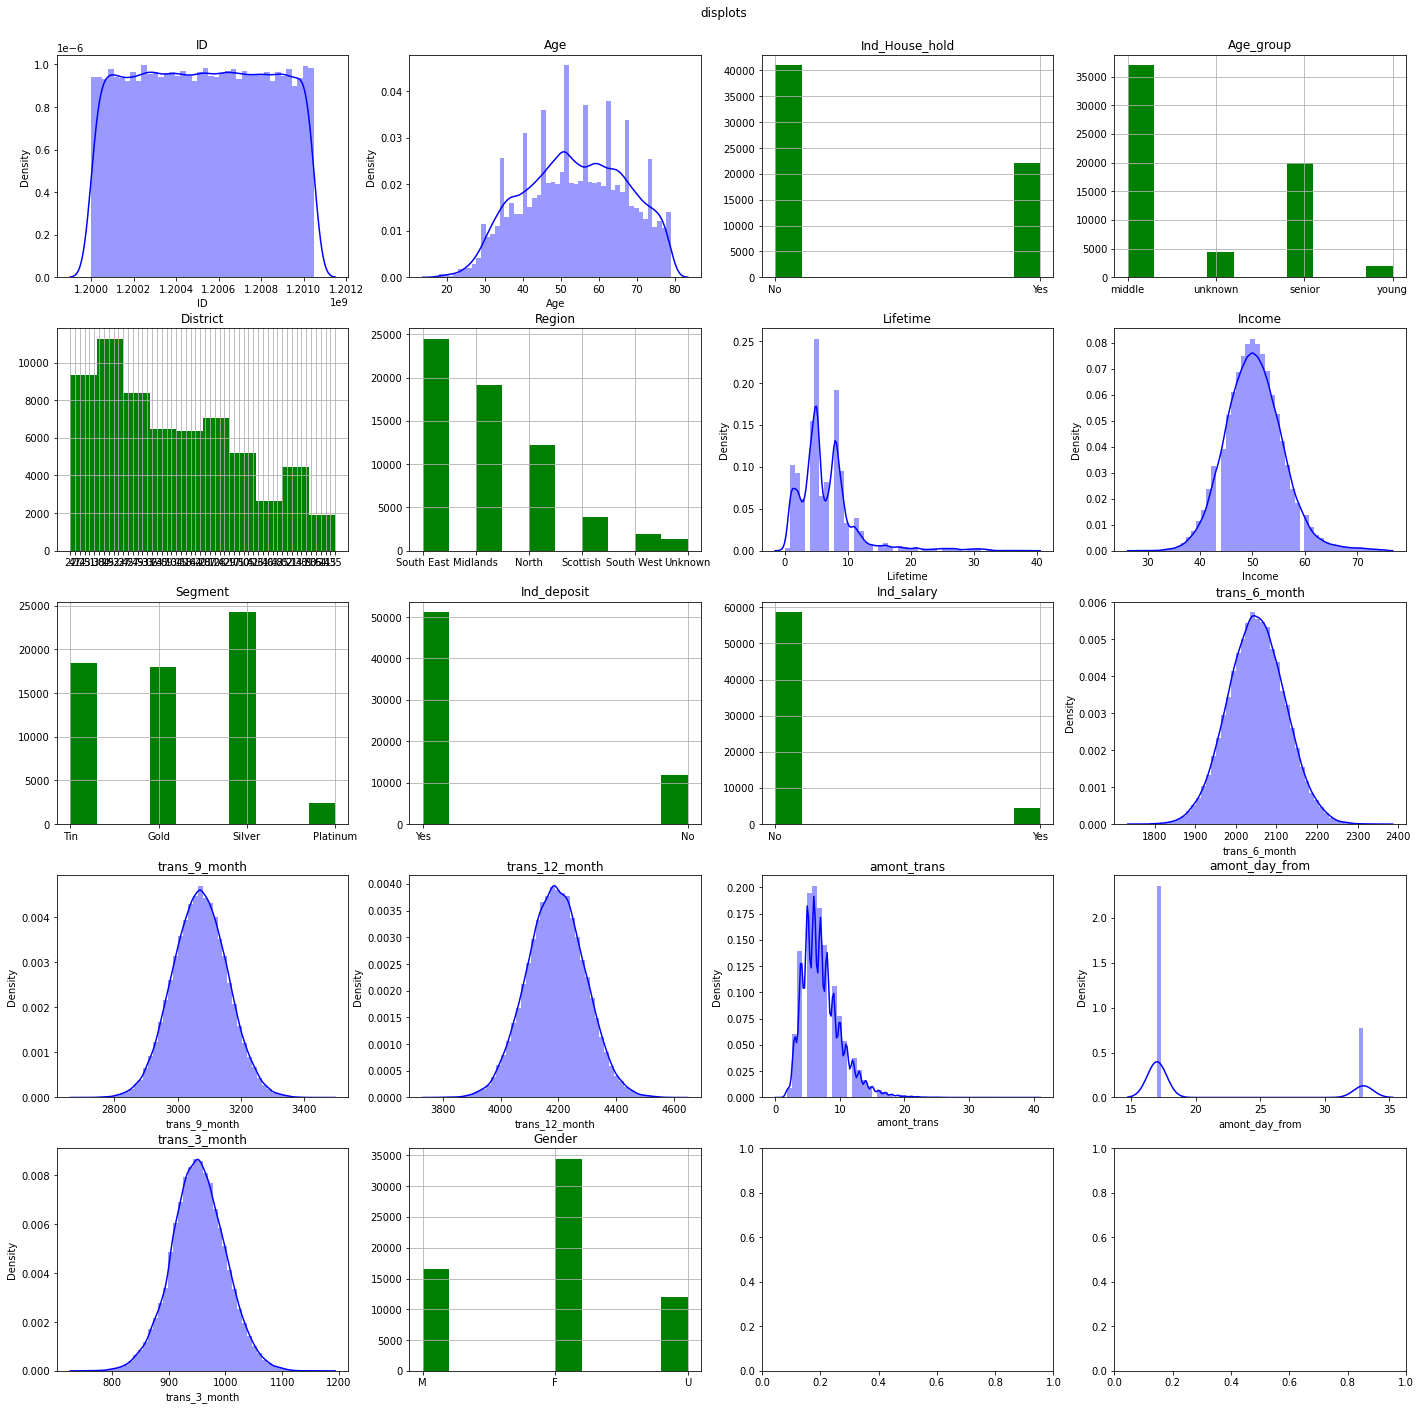

In [80]:
build_displots_without_nan(df_test, columns=df_test.columns, n_col=4, name='displots')

In [81]:
df_test['amont_day_from'].unique()

array([17, 33], dtype=int64)

In [82]:
df_train['amont_day_from'].unique()

array([21, 14, 16, 15, 26, 30, 18, 32, 25, 28, 27, 23, 20, 24, 31, 19, 34,
       13, 22, 35, 37, 38, 36, 29, 39, 12, 11, 40, 41, 42, 10],
      dtype=int64)

In [83]:
AGE_MEAN = df_train['Age'].mean()
LIFETIME_MEAN = df_train['Lifetime'].mean()

In [84]:
def do_one_hot_encoding(data, columns):
    for column in columns:
        tmp = pd.get_dummies(data[column], prefix=column)
        data = data.drop(columns=[column])
        data = data.join(tmp)
    return data

def transformation_yes_no_to_1_0(data, columns):
    for column in columns:
        data[column] = 1 * (data[column] == 'Yes')
    return data

def prepare_data(df, is_train=True):
    df['Age'].fillna(AGE_MEAN, inplace=True)
    df['Lifetime'].fillna(LIFETIME_MEAN, inplace=True)
    
    if not is_train:
        df.rename(columns={
            'Ind_House_hold' : 'Ind_Household'
        }, inplace=True)
    
    columns_to_delete = [
        'Ind_email',
        'Ind_phone'
    ]
    
    columns_to_label_encoding = [
        'Ind_Household',
        'Ind_deposit',                
        'Ind_salary'
    ]

    if is_train:
        df.drop(columns=columns_to_delete, inplace=True)
        columns_to_label_encoding += ['Target1', 'Target2']

    df = transformation_yes_no_to_1_0(df, columns=columns_to_label_encoding)
    
    columns_to_one_hot_encoding = [
        'Segment', 
        'Region', 
        'District', 
        'Age_group', 
        'Gender'
    ]
    
    df = do_one_hot_encoding(df, columns=columns_to_one_hot_encoding)
    
    return df

In [85]:
df_train = prepare_data(df_train)
df_test = prepare_data(df_test, False)

In [86]:
from sklearn.model_selection import train_test_split

X, y0, y1 = (df_train.drop(columns=['Target1', 'Target2']),
             df_train.loc[:, ['Target1']],
             df_train.loc[:, ['Target2']])

In [89]:
columns_0_to_drop = [
    'ID', 'trans_6_month', 'trans_9_month', 'trans_12_month',
    'trans_3_month', 'Region_Scottish', 'Region_South West', 'District_01', 'District_02', 'District_03',
    'District_04', 'District_05', 'District_06', 'District_07',
    'District_08', 'District_09', 'District_10', 'District_11',
    'District_12', 'District_13', 'District_14', 'District_15',
    'District_16', 'District_17', 'District_18', 'District_19',
    'District_20', 'District_21', 'District_22', 'District_23',
    'District_24', 'District_25', 'District_26', 'District_27',
    'District_28', 'District_29', 'District_30', 'District_31',
    'District_32', 'District_33', 'District_34', 'District_35',
    'District_36', 'District_37', 'District_38', 'District_39',
    'District_40', 'District_41', 'District_42', 'District_43',
    'District_44', 'District_45', 'District_46', 'District_47',
    'District_48', 'District_49', 'District_50', 'District_51',
    'District_52', 'District_53', 'District_54', 'District_55',
    'District_U'
]

columns_1_to_drop = [
    'ID', 'Ind_salary', 'trans_6_month', 'trans_9_month', 'trans_12_month',
    'trans_3_month', 'Segment_Platinum', 'Region_Scottish',
    'Region_South West', 'District_01', 'District_02',
    'District_03', 'District_04', 'District_05', 'District_06',
    'District_07', 'District_08', 'District_09', 'District_10',
    'District_11', 'District_12', 'District_13', 'District_14',
    'District_15', 'District_16', 'District_17', 'District_18',
    'District_19', 'District_20', 'District_21', 'District_22',
    'District_23', 'District_24', 'District_25', 'District_26',
    'District_27', 'District_28', 'District_29', 'District_30',
    'District_31', 'District_32', 'District_33', 'District_34',
    'District_35', 'District_36', 'District_37', 'District_38',
    'District_39', 'District_40', 'District_41', 'District_42',
    'District_43', 'District_44', 'District_45', 'District_46',
    'District_47', 'District_48', 'District_49', 'District_50',
    'District_51', 'District_52', 'District_53', 'District_54',
    'District_55', 'District_U',
]

In [90]:
X0 = X.copy()
X1 = X.copy()
X0.drop(columns=columns_0_to_drop)
X1.drop(columns=columns_1_to_drop)

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [91]:
assert X0_train.shape[0] == y0_train.shape[0], 'incorrect train shapes for 1 model'
assert X0_test.shape[0] == y0_test.shape[0], 'incorrect test shapes for 1 model'
assert X1_train.shape[0] == y1_train.shape[0], 'incorrect train shapes for 2 model'
assert X1_test.shape[0] == y1_test.shape[0], 'incorrect test shapes for 2 model'

In [93]:
# pip install hyperopt

# Модели

In [94]:
from datetime import datetime
from matplotlib import pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK

In [95]:
results = pd.DataFrame(
    index=[
        ['Target1', 'Target1', 'Target1', 'Target1',
         'Target2', 'Target2', 'Target2', 'Target2'],
        ['f1 test', 'f1 train', 'AUC-ROC test', 'AUC-ROC train',
         'f1 test', 'f1 train', 'AUC-ROC test', 'AUC-ROC train']
    ],
    columns=[
        'Decision tree', 'Random forest', 
        'Logistic regression', 'XGBoost'
    ]
)

In [96]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod(
            (datetime.now() - start_time).total_seconds(), 3600
        )
        tmin, tsec = divmod(temp_sec,60)

# Tar2
# Дерево решений

In [97]:
model = DecisionTreeClassifier()

parameters = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [1, 2, 4, 6, 8],
    'min_samples_leaf'  : [1, 3, 5, 7],
    'min_samples_split' : [1, 2, 4, 6, 8],
    'max_features'      : ['auto', 'log2', 'sqrt', None],
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=100,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X0, y0)
timer(start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   7.2s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   4.5s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   2.9s
[CV 1/3] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   4.4s
[CV 2/3] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   3.3s
[CV 3/3] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best; tota

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   1.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   1.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.2s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   3.8s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   2.4s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   3.4s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   2.6s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   3.2s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   3.5s
[CV 1/3] END criterion=entropy, m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   1.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   1.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   1.5s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   2.5s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   2.9s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   2.0s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   2.5s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   4.0s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   2.2s
[CV 1/3] END criterion=entropy, m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   2.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   1.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   2.1s
[CV 1/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   4.1s
[CV 2/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   3.5s
[CV 3/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   2.7s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   2.1s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   1.5s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   1.1s
[CV 1/3] END criterion=entr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   1.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   2.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   3.9s
[CV 1/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   2.6s
[CV 2/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   3.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   3.1s
[CV 1/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=  10.4s
[CV 2/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=  10.5s
[CV 3/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=  10.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1, splitter=random; total time=   3.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1, splitter=random; total time=   4.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1, splitter=random; total time=   1.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   2.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   1.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   1.8s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   2.1s
[CV 2/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   1.8s
[CV 3/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   1.6s
[CV 1/3] END criterion

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   1.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   0.9s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   1.7s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   2.6s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   1.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   1.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   1.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   1.2s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   1.6s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   1.4s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.6s
[CV 2/3] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.5s
[CV 3/3] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   3.0s
[CV 1/3] END criterion=entr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   1.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   2.7s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   2.7s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   2.6s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   3.9s
[CV 2/3] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   4.6s
[CV 3/3] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   3.2s
[CV 1/3] END criterio

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.3s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   5.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   5.7s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   4.4s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   6.6s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   3.9s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   5.3s
[CV 1/3] END criterion=entropy, max_dep

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   1.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   2.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   1.7s
[CV 1/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   3.6s
[CV 2/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   1.8s
[CV 3/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   1.8s
[CV 1/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   2.7s
[CV 2/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   3.1s
[CV 3/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   3.7s
[CV 1/3] END criterion=gini, max_dep

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.77717893 0.75918065 0.75647225 0.75290545 0.76275246 0.7437252
 0.81240353 0.75290545 0.89046421        nan 0.62371643 0.76392043
 0.77508451 0.86242802 0.78679666 0.75290545        nan 0.75290545
 0.75465992 0.77260353 0.77033659 0.76474743 0.71222554 0.59129622
 0.75290545 0.78081378 0.76001875 0.66726382 0.76176825 0.79209355
        nan 0.78183867 0.75705065 0.8116415  0.7908414  0.82043012
 0.78564292 0.85734119        nan 0.76061845 0.89884695        nan
        nan 0.75290545 0.76563939 0.75641035 0.77213481 0.75290545
 0.80388785 0.76348815 0.68862482 0.75547882 0.7558695  0.62876291
 0.78520758 0.84085983 0.75193735        nan 0.76469569        nan
        nan 0.75290545 0.7754052  0.75679494 0.81647585 0.75290545
 0.89884695 0.65471871 0.78264333 0.76314921 0.82898333 0.7584662
 0.78710611 0.75290545 0.7595124  0.75427839        nan

In [98]:
tuning_model.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_features': None,
 'max_depth': 6,
 'criterion': 'gini'}

In [99]:
tuning_model.best_score_

0.8988469539528352

In [100]:
dtc0 = DecisionTreeClassifier(
    splitter = 'best',
    min_samples_split = 4,
    min_samples_leaf = 7,
    max_features = None,
    max_depth = 6,
    criterion = 'gini'
)
dtc0 = dtc0.fit(X0_train, y0_train)

y0_train_pred = dtc0.predict(X0_train)
y0_test_pred = dtc0.predict(X0_test)

probs0_test = dtc0.predict_proba(X0_test)
probs0_train = dtc0.predict_proba(X0_train)

preds_test_dtc0 = probs0_test[:, 1]
preds_train_dtc0 = probs0_train[:, 1]

Decision tree
f1 test          0.764572
f1 train         0.763685
AUC-ROC test     0.924629
AUC-ROC train    0.924593
Name: Decision tree, dtype: object


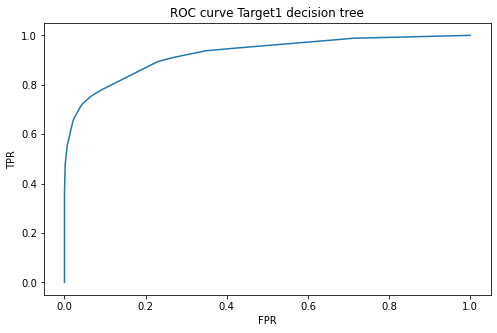

In [101]:
print('Decision tree')

results.loc[('Target1', 'f1 test'), 'Decision tree'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'Decision tree'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'Decision tree'] = roc_auc_score(y0_test, preds_test_dtc0)
results.loc[('Target1', 'AUC-ROC train'), 'Decision tree'] = roc_auc_score(y0_train, preds_train_dtc0)

print(results.loc['Target1', 'Decision tree'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_dtc0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 decision tree')
plt.show()

# Случайный лес

In [102]:
model = RandomForestClassifier()

parameters = {
    #'bootstrap'         : [True, False],
    'max_depth'         : [3, 5, 10, None],
    #'criterion'         : ['gini', 'entropy'],
    #'min_samples_leaf'  : [1, 2, 4],
    #'max_features'      : ['auto', 'log2', None],
    'n_estimators'      : [50, 100, 200, 500]
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=10,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X0, y0)
timer(start_time)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ...................max_depth=3, n_estimators=50; total time=  26.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...................max_depth=3, n_estimators=50; total time=  26.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...................max_depth=3, n_estimators=50; total time=  24.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=3, n_estimators=100; total time=  46.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=3, n_estimators=100; total time=  52.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=3, n_estimators=100; total time=  52.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=5, n_estimators=100; total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=5, n_estimators=100; total time= 1.5min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=5, n_estimators=100; total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ...............max_depth=None, n_estimators=200; total time=17.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...............max_depth=None, n_estimators=200; total time=15.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...............max_depth=None, n_estimators=200; total time=12.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ...............max_depth=None, n_estimators=100; total time= 5.7min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...............max_depth=None, n_estimators=100; total time= 5.7min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...............max_depth=None, n_estimators=100; total time= 5.6min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .................max_depth=10, n_estimators=500; total time=10.0min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .................max_depth=10, n_estimators=500; total time=10.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .................max_depth=10, n_estimators=500; total time=10.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=10, n_estimators=50; total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=10, n_estimators=50; total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=10, n_estimators=50; total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .................max_depth=10, n_estimators=100; total time= 2.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .................max_depth=10, n_estimators=100; total time= 2.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .................max_depth=10, n_estimators=100; total time= 2.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=3, n_estimators=200; total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=3, n_estimators=200; total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=3, n_estimators=200; total time= 1.5min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batc

[CV 1/3] END ...............max_depth=None, n_estimators=500; total time=19.5min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batc

[CV 2/3] END ...............max_depth=None, n_estimators=500; total time=19.0min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batc

[CV 3/3] END ...............max_depth=None, n_estimators=500; total time=17.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [103]:
rfc0 = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    criterion='gini',
    n_estimators=100,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='auto',
    random_state=42,
)

rfc0 = rfc0.fit(X0_train, y0_train)

y0_train_pred = rfc0.predict(X0_train)
y0_test_pred = rfc0.predict(X0_test)

probs0_test = rfc0.predict_proba(X0_test)
probs0_train = rfc0.predict_proba(X0_train)

preds_test_rfc0 = probs0_test[:, 1]
preds_train_rfc0 = probs0_train[:, 1]

<ipython-input-103-e360418ca2a9>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc0 = rfc0.fit(X0_train, y0_train)


Random forest
f1 test          0.714025
f1 train         0.712395
AUC-ROC test     0.924185
AUC-ROC train    0.925471
Name: Random forest, dtype: object


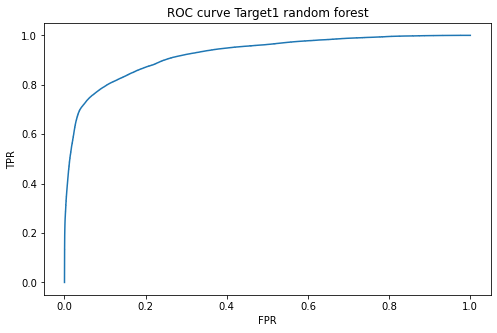

In [107]:
print('Random forest')

results.loc[('Target1', 'f1 test'), 'Random forest'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'Random forest'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'Random forest'] = roc_auc_score(y0_test, preds_test_rfc0)
results.loc[('Target1', 'AUC-ROC train'), 'Random forest'] = roc_auc_score(y0_train, preds_train_rfc0)

print(results.loc['Target1', 'Random forest'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_rfc0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 random forest')
plt.show()

# Logistic regression

In [116]:
from sklearn.pipeline import Pipeline
from datetime import datetime
from matplotlib import pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK
from sklearn.preprocessing import StandardScaler

In [117]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000)),
])

lr0 = pipeline.fit(X0_train, y0_train)

y0_train_pred = lr0.predict(X0_train)
y0_test_pred = lr0.predict(X0_test)

probs0_test = lr0.predict_proba(X0_test)
probs0_train = lr0.predict_proba(X0_train)

preds_test_lr0 = probs0_test[:, 1]
preds_train_lr0 = probs0_train[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic regression
f1 test          0.548718
f1 train         0.544586
AUC-ROC test     0.829914
AUC-ROC train    0.827963
Name: Logistic regression, dtype: object


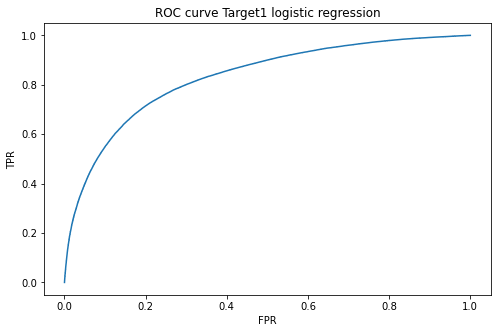

In [118]:
print('Logistic regression')

results.loc[('Target1', 'f1 test'), 'Logistic regression'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'Logistic regression'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'Logistic regression'] = roc_auc_score(y0_test, preds_test_lr0)
results.loc[('Target1', 'AUC-ROC train'), 'Logistic regression'] = roc_auc_score(y0_train, preds_train_lr0)

print(results.loc['Target1', 'Logistic regression'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_lr0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 logistic regression')
plt.show()

# XGboost

In [119]:
params = {
    "learning_rate":    hp.choice('learning_rate', np.arange(0.05, 0.21, 0.05)),
    "max_depth":        hp.choice('max_depth', np.arange(1, 5, 1, dtype=int)),
    "min_child_weight": hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    "gamma":            hp.choice('gamma', np.arange(0.0, 0.5, 0.1)),
    "colsample_bytree": hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    "subsample":        hp.choice('subsample', np.arange(0.8, 1.01, 0.05)),
    "n_estimators":     1000,
}

fit_params = {
    'eval_metric':           'auc',
    'eval_set':              [(X0_train, y0_train), (X0_test, y0_test)],
    'early_stopping_rounds': 10,
    'verbose':               False,
}

def objective(space):
    clf = xgboost.XGBClassifier(
        verbosity         = 0,
        use_label_encoder = False,
        learning_rate     = space['learning_rate'],
        max_depth         = space['max_depth'],
        min_child_weight  = space['min_child_weight'],
        gamma             = space['gamma'],
        colsample_bytree  = space['colsample_bytree'],
        subsample         = space['subsample'],
        n_estimators      = space['n_estimators'], 
    )
    print(f'''
------------------------
learning_rate    = {space['learning_rate']},
max_depth        = {space['max_depth']},
min_child_weight = {space['min_child_weight']},
gamma            = {space['gamma']},
colsample_bytree = {space['colsample_bytree']},
subsample        = {space['subsample']},
n_estimators     = {space['n_estimators']},
------------------------
''')
    
    clf.fit(X0_train, y0_train, **fit_params)
    
    y0_pred = clf.predict(X0_test)
    preds = clf.predict_proba(X0_test)[:,1]
    
    accuracy = accuracy_score(y0_test, y0_pred)
    roc_auc = roc_auc_score(y_test, preds)

    print(f"accuracy = {accuracy}, roc_auc = {roc_auc}")
    
    return {'loss': -roc_auc, 'status': STATUS_OK}

In [120]:
xgbc0 = xgboost.XGBClassifier(
    use_label_encoder=False,
    n_estimators=100,
    objective='binary:logistic',
    max_depth=3,
    eta=0.1,
)

xgbc0.fit(
    X0_train, y0_train,
    early_stopping_rounds=10,
    eval_metric='auc',
    eval_set=[(X0_test, y0_test)],
    verbose=True,
)

y0_train_pred = xgbc0.predict(X0_train)
y0_test_pred = xgbc0.predict(X0_test)

probs0_test = xgbc0.predict_proba(X0_test)
probs0_train = xgbc0.predict_proba(X0_train)

preds_test_xgbc0 = probs0_test[:, 1]
preds_train_xgbc0 = probs0_train[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.89988
[1]	validation_0-auc:0.90335
[2]	validation_0-auc:0.90365
[3]	validation_0-auc:0.90452
[4]	validation_0-auc:0.90460
[5]	validation_0-auc:0.91157
[6]	validation_0-auc:0.91404
[7]	validation_0-auc:0.91317
[8]	validation_0-auc:0.91280
[9]	validation_0-auc:0.91289
[10]	validation_0-auc:0.91375
[11]	validation_0-auc:0.91286
[12]	validation_0-auc:0.91519
[13]	validation_0-auc:0.91487
[14]	validation_0-auc:0.91883
[15]	validation_0-auc:0.91917
[16]	validation_0-auc:0.91936
[17]	validation_0-auc:0.92025
[18]	validation_0-auc:0.92102
[19]	validation_0-auc:0.92126
[20]	validation_0-auc:0.92160
[21]	validation_0-auc:0.92207
[22]	validation_0-auc:0.92205
[23]	validation_0-auc:0.92259
[24]	validation_0-auc:0.92301
[25]	validation_0-auc:0.92333
[26]	validation_0-auc:0.92411
[27]	validation_0-auc:0.92443
[28]	validation_0-auc:0.92460
[29]	validation_0-auc:0.92481
[30]	validation_0-auc:0.92508
[31]	validation_0-auc:0.92515
[32]	validation_0-auc:0.92520
[33]	validation_0-au

XGBoost
f1 test          0.773504
f1 train          0.77284
AUC-ROC test     0.931258
AUC-ROC train    0.931107
Name: XGBoost, dtype: object


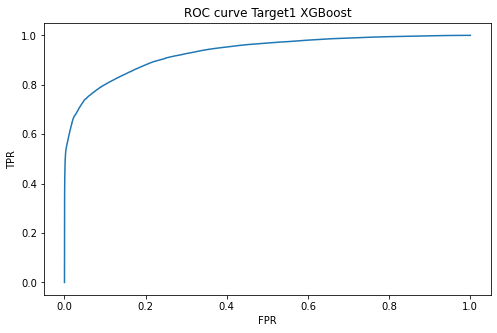

In [121]:
print('XGBoost')

results.loc[('Target1', 'f1 test'), 'XGBoost'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'XGBoost'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'XGBoost'] = roc_auc_score(y0_test, preds_test_xgbc0)
results.loc[('Target1', 'AUC-ROC train'), 'XGBoost'] = roc_auc_score(y0_train, preds_train_xgbc0)

print(results.loc['Target1', 'XGBoost'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_xgbc0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 XGBoost')
plt.show()

# Tar 2 ДР (Дерево решений)

In [122]:
model = DecisionTreeClassifier()

parameters = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [2, 4, 5, 6, 7, 8],
    'min_samples_leaf'  : [1, 3, 5, 7],
    'min_samples_split' : [1, 2, 4, 6, 8],
    'max_features'      : ['auto', 'log2', 'sqrt', None],
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=100,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X1, y1)
timer(start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   2.5s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   2.3s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   2.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   1.5s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   1.9s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   2.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   2.2s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.5s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.4s
[CV 1/3] END criterion=entropy, max_dept

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.7s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   1.8s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   1.5s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   1.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random; total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random; total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   1.2s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   1.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.6s
[CV 1/3] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.4s
[CV 2/3] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.5s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   1.3s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   1.1s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   1.2s
[CV 1/3] END criterion=gini, max_depth=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   1.5s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   1.5s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   1.4s
[CV 1/3] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   2.1s
[CV 2/3] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   2.0s
[CV 1/3] END criterion=gi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.7s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=random; total time=   1.3s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=random; total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, splitter=random; total time=   1.4s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   1.4s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   1.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   1.4s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   1.4s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   1.3s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.4s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   6.8s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   6.9s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   6.6s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   1.4s
[CV 2/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   1.5s
[CV 1/3] END criterio

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=1, splitter=best; total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   1.5s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   1.6s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   1.5s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   1.3s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   1.7s
[CV 1/3] END criterion=gini, m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   1.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   1.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, splitter=random; total time=   1.8s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.4s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.7s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.3s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best; total time=   2.8s
[CV 2/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best; total time=   2.8s
[CV 3/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   1.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.8s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.5s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.4s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.3s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.1s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.1s
[CV 1/3] END criterion=gini

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   1.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   2.9s
[CV 2/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   4.2s
[CV 3/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   3.3s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   5.8s
[CV 2/3] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   6.0s
[CV 3/3] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   6.5s
[CV 1/3] END criterion=entro

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.9s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.8s
[CV 2/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   1.5s
[CV 1/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   4.7s
[CV 2/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   4.4s
[CV 3/3] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   4.4s
[CV 1/3] END criterion

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, splitter=random; total time=   0.6s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, splitter=random; total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, splitter=random; total time=   1.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, splitter=random; total time=   1.2s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   1.5s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   2.3s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   1.9s
[CV 1/3] END criterion=entropy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 1/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 2/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 3/3] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=1, splitter=random; total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   1.5s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   1.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   8.2s
[CV 2/3] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   8.5s
[CV 3/3] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   8.3s
[CV 1/3] END criterion=gini, max_depth=8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91437243        nan        nan 0.64011511 0.91437243 0.91437243
 0.64559978 0.85861257 0.78236719 0.91436533 0.91437142 0.91437243
        nan        nan 0.90867569        nan        nan 0.91437243
        nan 0.91437243        nan        nan 0.91436025 0.91603457
 0.91594122 0.85053627 0.63821553        nan 0.91437243 0.91589352
 0.81523963 0.91437243 0.8363411  0.91437243        nan 0.91437243
 0.91437243        nan 0.63821654 0.91442723        nan 0.93416488
 0.91433286 0.65390541 0.91436837 0.89616194        nan 0.91445462
 0.91437243 0.91323082        nan 0.91437142 0.83303001        nan
 0.91436736 0.91436939 0.9195892  0.91436228        nan 0.91437243
 0.92238479 0.91239978 0.91466772 0.83709607 0.9143704  0.91437243
        nan 0.91439476 0.922192   0.93416488 0.91438867 0.91437243
 0.91435924 0.88966254 0.91435417        nan 0.914372

In [123]:
tuning_model.best_params_


{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 6,
 'criterion': 'entropy'}

In [124]:
tuning_model.best_score_

0.9341648766547185

In [125]:
dtc1 = DecisionTreeClassifier(
    splitter = 'best',
    min_samples_split = 4,
    min_samples_leaf = 7,
    max_features = None,
    max_depth = 6,
    criterion = 'gini'
)
dtc1 = dtc1.fit(X1_train, y1_train)

y1_train_pred = dtc1.predict(X1_train)
y1_test_pred = dtc1.predict(X1_test)

probs1_test = dtc1.predict_proba(X1_test)
probs1_train = dtc1.predict_proba(X1_train)

preds_test_dtc1 = probs1_test[:, 1]
preds_train_dtc1 = probs1_train[:, 1]

Decision tree
f1 test          0.441479
f1 train         0.439915
AUC-ROC test      0.92256
AUC-ROC train    0.922415
Name: Decision tree, dtype: object


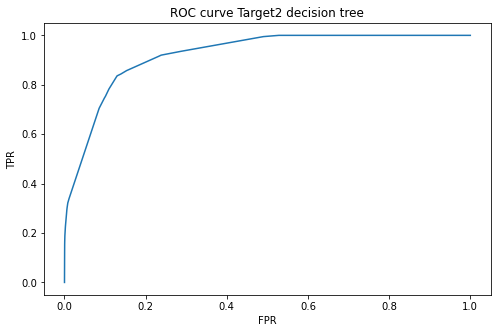

In [126]:
print('Decision tree')

results.loc[('Target2', 'f1 test'), 'Decision tree'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'Decision tree'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'Decision tree'] = roc_auc_score(y1_test, preds_test_dtc1)
results.loc[('Target2', 'AUC-ROC train'), 'Decision tree'] = roc_auc_score(y1_train, preds_train_dtc1)

print(results.loc['Target2', 'Decision tree'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_dtc1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 decision tree')
plt.show()

# Случайный лес

In [127]:
model = RandomForestClassifier()

parameters = {
    #'bootstrap'         : [True, False],
    'max_depth'         : [3, 5, 10, None],
    #'criterion'         : ['gini', 'entropy'],
    #'min_samples_leaf'  : [1, 2, 4],
    #'max_features'      : ['auto', 'log2', None],
    'n_estimators'      : [50, 100, 200, 500]
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=10,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X1, y1)
timer(start_time)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ...................max_depth=3, n_estimators=50; total time=  22.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...................max_depth=3, n_estimators=50; total time=  21.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...................max_depth=3, n_estimators=50; total time=  19.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=3, n_estimators=100; total time=  37.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=3, n_estimators=100; total time=  38.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=3, n_estimators=100; total time=  46.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=5, n_estimators=100; total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=5, n_estimators=100; total time= 1.3min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=5, n_estimators=100; total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ...............max_depth=None, n_estimators=200; total time= 9.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...............max_depth=None, n_estimators=200; total time= 9.5min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...............max_depth=None, n_estimators=200; total time= 9.6min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ...............max_depth=None, n_estimators=100; total time= 4.6min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...............max_depth=None, n_estimators=100; total time= 4.7min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...............max_depth=None, n_estimators=100; total time= 4.9min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .................max_depth=10, n_estimators=500; total time= 9.9min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .................max_depth=10, n_estimators=500; total time=10.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .................max_depth=10, n_estimators=500; total time= 9.8min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=10, n_estimators=50; total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=10, n_estimators=50; total time=  58.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=10, n_estimators=50; total time= 1.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .................max_depth=10, n_estimators=100; total time= 1.8min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .................max_depth=10, n_estimators=100; total time= 1.8min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .................max_depth=10, n_estimators=100; total time= 1.8min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................max_depth=3, n_estimators=200; total time= 1.3min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................max_depth=3, n_estimators=200; total time= 1.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................max_depth=3, n_estimators=200; total time= 1.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batc

[CV 1/3] END ...............max_depth=None, n_estimators=500; total time=15.0min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batc

[CV 2/3] END ...............max_depth=None, n_estimators=500; total time=16.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batc

[CV 3/3] END ...............max_depth=None, n_estimators=500; total time=17.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [128]:
rfc1 = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    criterion='gini',
    n_estimators=100,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='auto',
    random_state=42,
)

rfc1 = rfc1.fit(X1_train, y1_train)

y1_train_pred = rfc1.predict(X1_train)
y1_test_pred = rfc1.predict(X1_test)

probs1_test = rfc1.predict_proba(X1_test)
probs1_train = rfc1.predict_proba(X1_train)

preds_test_rfc1 = probs1_test[:, 1]
preds_train_rfc1 = probs1_train[:, 1]

<ipython-input-128-8cbb45d3fe60>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1 = rfc1.fit(X1_train, y1_train)


Random forest
f1 test               0.0
f1 train         0.000067
AUC-ROC test     0.873042
AUC-ROC train    0.879054
Name: Random forest, dtype: object


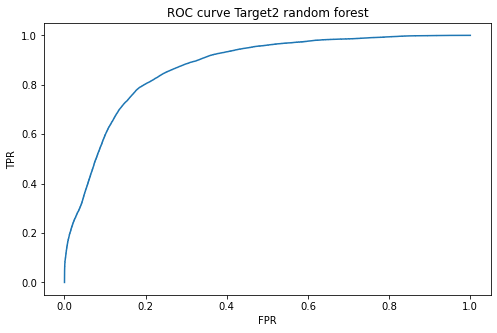

In [129]:
print('Random forest')

results.loc[('Target2', 'f1 test'), 'Random forest'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'Random forest'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'Random forest'] = roc_auc_score(y1_test, preds_test_rfc1)
results.loc[('Target2', 'AUC-ROC train'), 'Random forest'] = roc_auc_score(y1_train, preds_train_rfc1)

print(results.loc['Target2', 'Random forest'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_rfc1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 random forest')
plt.show()

# Лог. регрессия

In [130]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression()),
])

lr1 = pipeline.fit(X1_train, y1_train)

y1_train_pred = lr1.predict(X1_train)
y1_test_pred = lr1.predict(X1_test)

probs1_test = lr1.predict_proba(X1_test)
probs1_train = lr1.predict_proba(X1_train)

preds_test_lr1 = probs1_test[:, 1]
preds_train_lr1 = probs1_train[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic regression
f1 test          0.005767
f1 train         0.006167
AUC-ROC test     0.755483
AUC-ROC train    0.754065
Name: Logistic regression, dtype: object


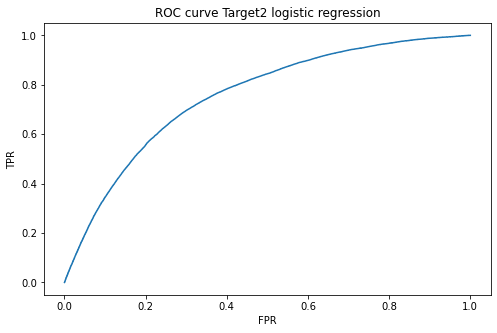

In [131]:
print('Logistic regression')

results.loc[('Target2', 'f1 test'), 'Logistic regression'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'Logistic regression'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'Logistic regression'] = roc_auc_score(y1_test, preds_test_lr1)
results.loc[('Target2', 'AUC-ROC train'), 'Logistic regression'] = roc_auc_score(y1_train, preds_train_lr1)

print(results.loc['Target2', 'Logistic regression'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_lr1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 logistic regression')
plt.show()

# XGbust

In [132]:
xgbc1 = xgboost.XGBClassifier(
    use_label_encoder=False,
    n_estimators=100,
    objective='binary:logistic',
    max_depth=3,
    eta=0.1,
)

xgbc1.fit(
    X1_train, y1_train,
    early_stopping_rounds=10,
    eval_metric='auc',
    eval_set=[(X1_test, y1_test)],
    verbose=True,
)

y1_train_pred = xgbc1.predict(X1_train)
y1_test_pred = xgbc1.predict(X1_test)

probs1_test = xgbc1.predict_proba(X1_test)
probs1_train = xgbc1.predict_proba(X1_train)

preds_test_xgbc1 = probs1_test[:, 1]
preds_train_xgbc1 = probs1_train[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84303
[1]	validation_0-auc:0.84587
[2]	validation_0-auc:0.84663
[3]	validation_0-auc:0.84611
[4]	validation_0-auc:0.85198
[5]	validation_0-auc:0.84906
[6]	validation_0-auc:0.85067
[7]	validation_0-auc:0.84993
[8]	validation_0-auc:0.85294
[9]	validation_0-auc:0.85238
[10]	validation_0-auc:0.85544
[11]	validation_0-auc:0.85565
[12]	validation_0-auc:0.85644
[13]	validation_0-auc:0.87401
[14]	validation_0-auc:0.88259
[15]	validation_0-auc:0.88184
[16]	validation_0-auc:0.88865
[17]	validation_0-auc:0.88967
[18]	validation_0-auc:0.89421
[19]	validation_0-auc:0.89748
[20]	validation_0-auc:0.89916
[21]	validation_0-auc:0.90256
[22]	validation_0-auc:0.90649
[23]	validation_0-auc:0.90739
[24]	validation_0-auc:0.90889
[25]	validation_0-auc:0.91005
[26]	validation_0-auc:0.91243
[27]	validation_0-auc:0.91434
[28]	validation_0-auc:0.91621
[29]	validation_0-auc:0.91623
[30]	validation_0-auc:0.91619
[31]	validation_0-auc:0.91703
[32]	validation_0-auc:0.91827
[33]	validation_0-au

XGBoost
f1 test          0.744886
f1 train         0.746809
AUC-ROC test     0.966241
AUC-ROC train    0.966604
Name: XGBoost, dtype: object


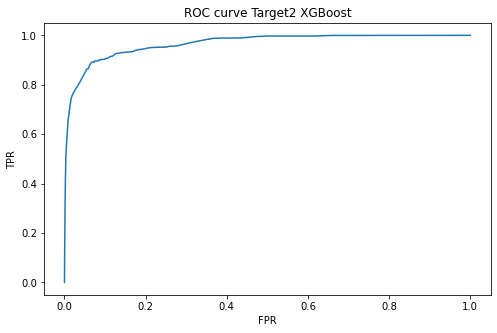

In [133]:
print('XGBoost')

results.loc[('Target2', 'f1 test'), 'XGBoost'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'XGBoost'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'XGBoost'] = roc_auc_score(y1_test, preds_test_xgbc1)
results.loc[('Target2', 'AUC-ROC train'), 'XGBoost'] = roc_auc_score(y1_train, preds_train_xgbc1)

print(results.loc['Target2', 'XGBoost'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_xgbc1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 XGBoost')
plt.show()

In [134]:
results

Decision tree Random forest Logistic regression  \
Target1 f1 test            0.764572      0.714025            0.548718   
        f1 train           0.763685      0.712395            0.544586   
        AUC-ROC test       0.924629      0.924185            0.829914   
        AUC-ROC train      0.924593      0.925471            0.827963   
Target2 f1 test            0.441479           0.0            0.005767   
        f1 train           0.439915      0.000067            0.006167   
        AUC-ROC test        0.92256      0.873042            0.755483   
        AUC-ROC train      0.922415      0.879054            0.754065   

                        XGBoost  
Target1 f1 test        0.773504  
        f1 train        0.77284  
        AUC-ROC test   0.931258  
        AUC-ROC train  0.931107  
Target2 f1 test        0.744886  
        f1 train       0.746809  
        AUC-ROC test   0.966241  
        AUC-ROC train  0.966604